In [1]:
# Clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
x1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
x2 = [5, 4, 5, 6, 5, 18, 16, 17, 15, 14, 1, 2, 1, 2, 3, 2, 3]
x = {'col1':x1,'col2':x2}

X = pd.DataFrame(x)
X


,col1,col2
0,3,5
1,1,4
2,1,5
3,2,6
4,1,5
5,6,18
6,6,16
7,6,17
8,5,15
9,6,14


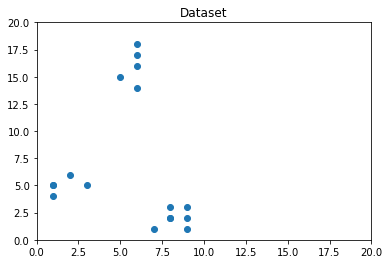

In [6]:
plt.plot()
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [32]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1))**2 / X.shape[0])

In [33]:
#Breaking down the for loop logic

#The compute distance function output is as follows - a 17x9 Matrix 
#(Since the last kmeans in the for loop is run for 9 centroids)

cdist(X,kmeanModel.cluster_centers_,'euclidean')

array([[12.85496013,  5.85234996,  0.70710678,  9.82344135,  7.21110255,
         2.02758751,  5.65685425, 11.40175425,  6.11918658],
       [14.39618005,  7.56637298,  2.12132034, 11.42365966,  8.54400375,
         0.66666667,  6.70820393, 13.        ,  7.6011695 ],
       [13.46291202,  7.76208735,  1.58113883, 10.51189802,  8.94427191,
         0.33333333,  7.21110255, 12.08304597,  7.92324288],
       [12.17579566,  7.15891053,  0.70710678,  9.19238816,  8.60232527,
         1.66666667,  7.07106781, 10.77032961,  7.49073502],
       [13.46291202,  7.76208735,  1.58113883, 10.51189802,  8.94427191,
         0.33333333,  7.21110255, 12.08304597,  7.92324288],
       [ 0.5       , 15.20690633, 12.98075499,  3.53553391, 17.2626765 ,
        14.24000624, 17.02938637,  2.        , 16.16924378],
       [ 1.5       , 13.23820229, 11.06797181,  1.58113883, 15.29705854,
        12.38726945, 15.03329638,  0.        , 14.19311257],
       [ 0.5       , 14.22146265, 12.02081528,  2.54950976, 16

In [35]:
# Axis=1 calculates the minimum distance out of the 9 centroids for the 17 observations and square the value
np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)**2

array([0.5       , 0.44444444, 0.11111111, 0.5       , 0.11111111,
       0.25      , 0.        , 0.25      , 0.5       , 0.5       ,
       0.        , 0.11111111, 0.        , 0.11111111, 0.25      ,
       0.44444444, 0.25      ])

In [36]:
#Divide the min squared distance by the total number of observations
np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)**2 / X.shape[0]

array([0.02941176, 0.02614379, 0.00653595, 0.02941176, 0.00653595,
       0.01470588, 0.        , 0.01470588, 0.02941176, 0.02941176,
       0.        , 0.00653595, 0.        , 0.00653595, 0.01470588,
       0.02614379, 0.01470588])

In [37]:
#Calculate the sum of squared distances - This is the distortion(WSS) for the kmeans model with 9 clusters
sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)**2 / X.shape[0])

0.25490196078431376

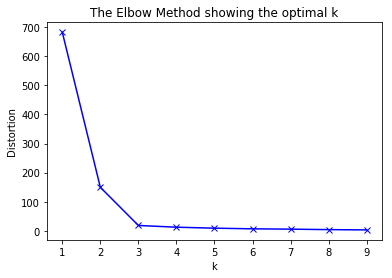

In [38]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
# Build kmeans clustering model using k=3

kmeans = KMeans(n_clusters=3)

Parameters
----------

n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.
    
  <br>  <br>


init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.
    
  
  <br>  <br>


n_init : int, default: 10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.
    
  <br>  <br>
  

max_iter : int, default: 300
    Maximum number of iterations of the k-means algorithm for a
    single run.
    
   <br>  <br>


tol : float, default: 1e-4
    Relative tolerance with regards to inertia to declare convergence

  <br>  <br>



precompute_distances : {'auto', True, False}
    Precompute distances (faster but takes more memory).

    'auto' : do not precompute distances if n_samples * n_clusters > 12
    million. This corresponds to about 100MB overhead per job using
    double precision.

    True : always precompute distances

    False : never precompute distances

  <br>  <br>



verbose : int, default 0
    Verbosity mode. Whether to print log output or not


  <br>  <br>


random_state : int, RandomState instance or None (default)
    Determines random number generation for centroid initialization. Use
    an int to make the randomness deterministic.
    See :term:`Glossary <random_state>`.


  <br>  <br>


copy_x : boolean, optional
    When pre-computing distances it is more numerically accurate to center
    the data first.  If copy_x is True (default), then the original data is
    not modified, ensuring X is C-contiguous.  If False, the original data
    is modified, and put back before the function returns, but small
    numerical differences may be introduced by subtracting and then adding
    the data mean, in this case it will also not ensure that data is
    C-contiguous which may cause a significant slowdown.


  <br>  <br>


n_jobs : int or None, optional (default=None)
    The number of jobs to use for the computation. This works by computing
    each of the n_init runs in parallel.

    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

  <br>  <br>


algorithm : "auto", "full" or "elkan", default="auto"
    K-means algorithm to use. The classical EM-style algorithm is "full".
    The "elkan" variation is more efficient by using the triangle
    inequality, but currently doesn't support sparse data. "auto" chooses
    "elkan" for dense data and "full" for sparse data.

In [10]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
clusters = kmeans.labels_
clusters

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

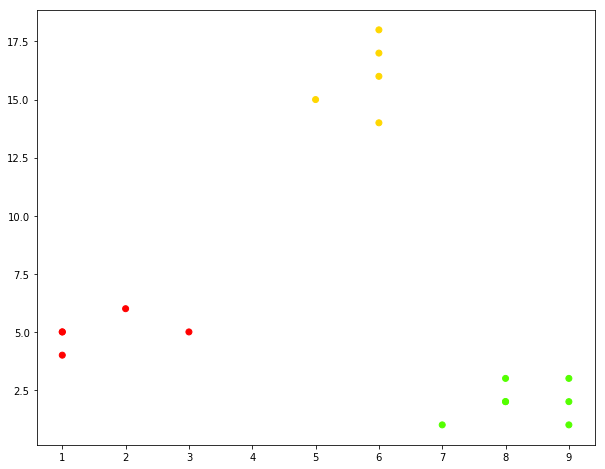

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(x1, x2, c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [39]:
# Extract cluster centers and use them for re-running the KMeans algorithm again
cluster_center = kmeans.cluster_centers_

cluster_center

array([[ 1.6       ,  5.        ],
       [ 5.8       , 16.        ],
       [ 8.28571429,  2.        ]])

In [40]:
# Provide the cluster center values as input for the second KMeans algorithm run

kmeans = KMeans(n_clusters=3,init=cluster_center)
kmeans.fit(X)


C:\Users\gurubagi\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
    init=array([[ 1.6    ,  5.     ],
       [ 5.8    , 16.     ],
       [ 8.28571,  2.     ]]),
    max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [41]:
# Minibatch KMeans is an alternative to KMeans, which is effective for huge datasets

from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size = 5)

minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=5, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [42]:
# The above algorithm randomly picks up subsets of the original data according to the batch_size mentioned
# It adjusts the centroids until the max_iterations are reached.

In [43]:
# Perform Silhoutte Analysis to validate Clusters

from sklearn.metrics import silhouette_samples, silhouette_score

The Silhouette Coefficient is a measure of how well samples are clustered
with samples that are similar to themselves. Clustering models with a high
Silhouette Coefficient are said to be dense, where samples in the same
cluster are similar to each other, and well separated, where samples in
different clusters are not very similar to each other.

The Silhouette Coefficient is calculated using the mean intra-cluster
distance (``a``) and the mean nearest-cluster distance (``b``) for each
sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
b)``.
Note that Silhouette Coefficient is only defined if number of labels
is 2 <= n_labels <= n_samples - 1.

This function returns the Silhouette Coefficient for each sample.

The best value is 1 and the worst value is -1. Values near 0 indicate
overlapping clusters.

In [44]:
sil_score = silhouette_score(X,clusters)

In [45]:
sil_score

0.8052079926817628

In [46]:
sil_samples = silhouette_samples(X,clusters)

In [47]:
sil_samples

array([0.6882728 , 0.78706863, 0.86070578, 0.78396829, 0.86070578,
       0.81513349, 0.86488012, 0.85867586, 0.80571659, 0.74069591,
       0.70147696, 0.85368052, 0.80147034, 0.85368052, 0.79095008,
       0.84103515, 0.78041907])